# Lab 3 Semnale
_Theodor Moroianu - Grupa 334_

## Exercitiul 1

Se da semnalul sonor generat de un contrabas, incadrat intre $40Hz$ si $200Hz$. Dorim sa aflam frecventa minima de esantionare trece-banda.\
Conform teoremei Niquist, frecventa minima de esantionare trebuie sa fie $2 * frecventa\ maxima = 2 * 200 = 400Hz$.


## Exercitiul 2

Stim ca pentru o esantionare eficienta sub-Nyquist, trebuie sa avem:
$$
\frac{2f_c - B}{m} \geq f_s \geq \frac{2f_c + B}{m + 1}\\
f_s > 2B
$$

Din enunt, stim:
 * $B = 10Hz$.
 * $f_c = 90Hz$.

Dorim sa vedem frecventa optima de esantionare pentru $m = 1$, $m = 2$, $m = 3$.

In [1]:
def good_esant_interval(fc, B, m):
    min_value = (2 * fc + B) / (m + 1)
    max_value = (2 * fc - B) / m
    min_value = max(min_value, 2 * B)

    return min_value, max_value

B = 10
fc = 90

print(f"Intervalul de esantionare sub-Nyquist este:")
for m in [1, 2, 4]:
    min_v, max_v = good_esant_interval(fc, B, m)
    if min_v > max_v:
        print(f" * Pentru m={m}, NU poate fi esantionat semnalul a.i. sa aiba {m} replici.")
    else:
        print(f" * Pentru m={m}, semnalul poate fi esantionat intre {min_v} si {max_v} Hz")
print("\nFrecventa optima de esantionare este:")
print(f" * Pentru m=1, frecventa optima de esantionare este 95Hz (minimizeaza frecventa de esantionare).")
print(f" * Pentru m=2, frecventa optima de esantionare este 85Hz (o replica va atinge 0).")
print(f" * Pentru m=4, frecventa optima de esantionare este 42.5Hz (o replica va atinge 0).")


Intervalul de esantionare sub-Nyquist este:
 * Pentru m=1, semnalul poate fi esantionat intre 95.0 si 170.0 Hz
 * Pentru m=2, semnalul poate fi esantionat intre 63.333333333333336 si 85.0 Hz
 * Pentru m=4, semnalul poate fi esantionat intre 38.0 si 42.5 Hz

Frecventa optima de esantionare este:
 * Pentru m=1, frecventa optima de esantionare este 95Hz (minimizeaza frecventa de esantionare).
 * Pentru m=2, frecventa optima de esantionare este 85Hz (o replica va atinge 0).
 * Pentru m=4, frecventa optima de esantionare este 42.5Hz (o replica va atinge 0).


## Exercitiul 3

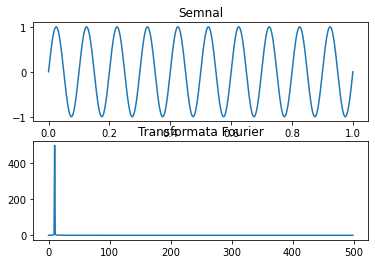

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# frecventa semnalului
fc = 10

# functie care calculeaza semnalul intr-un punct
def semnal(t):
    return np.sin(2 * np.pi * fc * t)

orizont_timp = 1
fs = 1000

# puncte discrete de esantionare
disc_time = np.linspace(0, orizont_timp, int(orizont_timp * fs) + 1)

# semnalul discret, esantionat la frecventa fs, pe o lungime de orizont_timp s
semnal_disc = semnal(disc_time)

# transformata Fourier a semnalului discret
fft = np.fft.fft(semnal_disc)
fft = fft[: len(fft) // 2]
fft = np.abs(fft)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False)

axes[0].plot(disc_time, semnal_disc)
axes[0].set_title("Semnal")

axes[1].plot(fft)
axes[1].set_title("Transformata Fourier")

plt.show()


## Exercitiul 4

Am citit 503 elemente. 24h * 7z * 3 sapt = 504


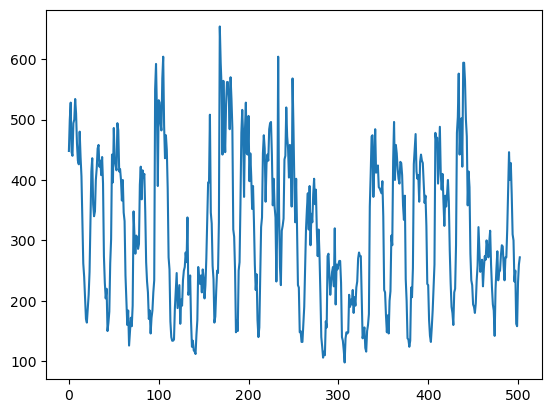

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Citim datele
with open('trafic.csv') as fin:
    reader = csv.reader(fin)
    data = np.array(list(reader))
    data = data[1:]
    data = [int(i) for i in data]

# Afisari de verificare
print(f"Am citit {len(data)} elemente. 24h * 7z * 3 sapt = {24 * 7 * 3}")
plt.plot(data)
plt.show()

Datele pentru 3 zile ne-procesate:


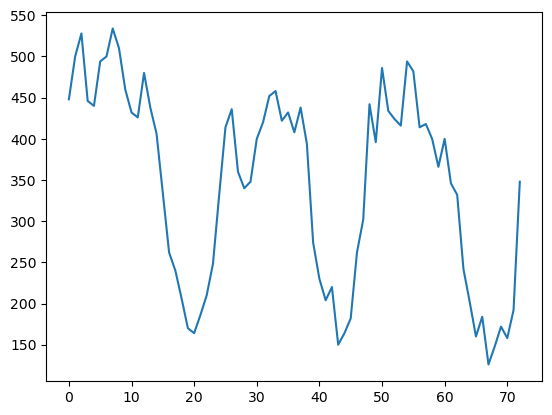

In [17]:
raw_3d = data[:24 * 3 + 1]
print(f"Datele pentru 3 zile ne-procesate:")
plt.plot(raw_3d)
plt.show()

Clean signal:


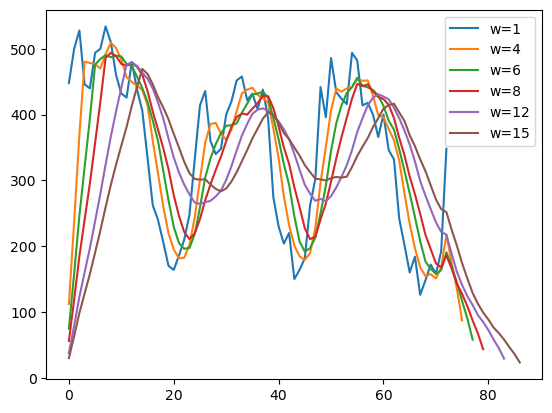

In [24]:
# filtru de netezire
def clean_signal(signal, strength):
    return np.convolve(signal, np.ones(strength)) / strength

strengths = [1, 4, 6, 8, 12, 15]
clean_3d = [clean_signal(raw_3d, i) for i in strengths]
print("Clean signal:")
for i in clean_3d:
    plt.plot(i)
plt.legend([f"w={i}" for i in strengths])
# plt.plot(clean_3d) #,# ["Smooth 2", 'sd', 'd', 'ff'])
plt.show()

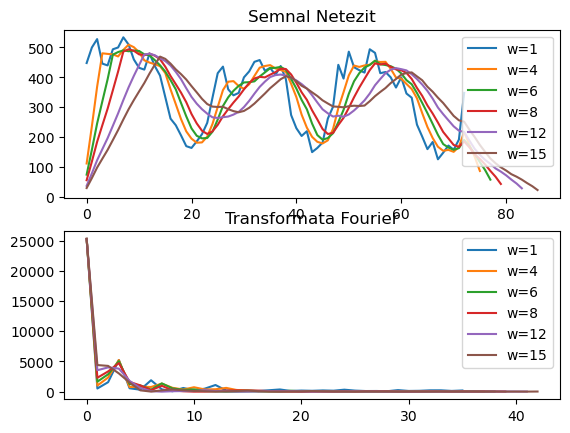

In [26]:
# Transformata Fourier
def compute_fft(semnal):
    fft = np.fft.fft(semnal)
    fft = fft[: len(fft) // 2]
    fft = np.abs(fft)
    return fft

fft = [compute_fft(i) for i in clean_3d]


fig, axes = plt.subplots(ncols=1, nrows=2)

for i in clean_3d:
    axes[0].plot(i)
axes[0].set_title("Semnal Netezit")
axes[0].legend([f"w={i}" for i in strengths])

for i in fft:
    axes[1].plot(i)

axes[1].legend([f"w={i}" for i in strengths])
axes[1].set_title("Transformata Fourier")
plt.show()